In [1]:
import pickle
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
from scipy.misc import imread, imresize
import glob

In [2]:
%matplotlib inline
sns.set_context("poster")

In [12]:
# termination criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)
path = "camera_cal"
from os import listdir
from os.path import isfile, join
images = sorted(["{}/{}".format(path, f) for f in listdir(path) if isfile(join(path, f))])


/root/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


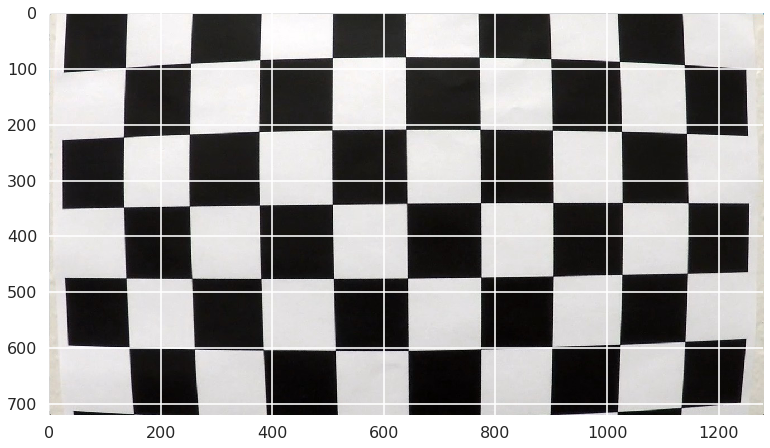

In [21]:
plt.imshow(imread(images[0]))

In [14]:
nx = 9 # the number of inside corners in x
ny = 6 # the number of inside corners in y

In [24]:
# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((nx*ny,3), np.float32)
objp[:,:2] = np.mgrid[0:nx,0:ny].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane.

for i, fname in enumerate(images):
    print('processing', i, fname)
    img = imread(fname)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)
    img = cv2.drawChessboardCorners(img, (nx, ny), corners, True)

    if ret:
        print('FOUND corners!')
        objpoints.append(objp)
        
        corners2 = cv2.cornerSubPix(gray,corners,(11,11),(-1,-1),criteria)
        imgpoints.append(corners2)
        


processing 0 camera_cal/calibration1.jpg
processing 1 camera_cal/calibration10.jpg
FOUND corners!
processing 2 camera_cal/calibration11.jpg
FOUND corners!
processing 3 camera_cal/calibration12.jpg
FOUND corners!
processing 4 camera_cal/calibration13.jpg
FOUND corners!
processing 5 camera_cal/calibration14.jpg
FOUND corners!
processing 6 camera_cal/calibration15.jpg
FOUND corners!
processing 7 camera_cal/calibration16.jpg
FOUND corners!
processing 8 camera_cal/calibration17.jpg
FOUND corners!
processing 9 camera_cal/calibration18.jpg
FOUND corners!
processing 10 camera_cal/calibration19.jpg
FOUND corners!
processing 11 camera_cal/calibration2.jpg
FOUND corners!
processing 12 camera_cal/calibration20.jpg
FOUND corners!
processing 13 camera_cal/calibration3.jpg
FOUND corners!
processing 14 camera_cal/calibration4.jpg
processing 15 camera_cal/calibration5.jpg
processing 16 camera_cal/calibration6.jpg
FOUND corners!
processing 17 camera_cal/calibration7.jpg
FOUND corners!
processing 18 came

In [25]:
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[0:2],None,None)

/root/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


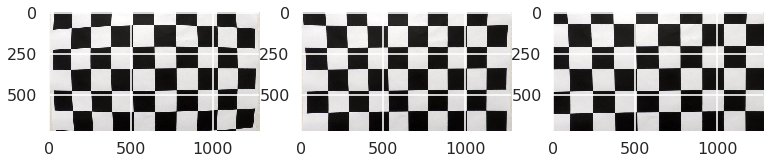

In [26]:
img = imread(images[0])
h,  w = img.shape[:2]
newcameramtx, roi=cv2.getOptimalNewCameraMatrix(mtx,dist,(w,h),0,(w,h))

plt.subplot(1,3,1)
plt.imshow(img)

plt.subplot(1,3,2)
undistort = cv2.undistort(img, mtx, dist, None, newcameramtx)
plt.imshow(undistort)

plt.subplot(1,3,3)
undistort = cv2.undistort(img, mtx, dist, None, mtx)
plt.imshow(undistort)

In [27]:
calibration_data = {
    "mtx": mtx,
    "camera_mtx": newcameramtx,
    "dist": dist
}

In [28]:
with open("udacity_project_4_camera_calibration.pkl", 'wb') as f:
    pickle.dump(calibration_data, f)